In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    plt.loglog(f, np.abs(np.fft.rfft(s)))

In [2]:
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

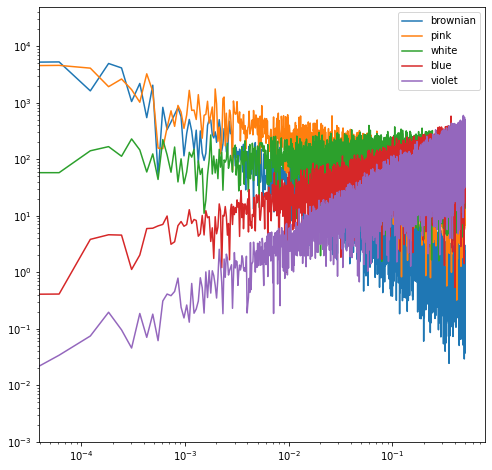

In [3]:
plt.figure(figsize=(8, 8))
for G in [brownian_noise, pink_noise, white_noise, blue_noise, violet_noise]:
    plot_spectrum(G(2**14))
plt.legend(['brownian', 'pink', 'white', 'blue', 'violet'])
plt.ylim([1e-3, None]);

In [4]:
def pink(sr):
    x_n = np.random.randn(sr)
    X_u = np.fft.rfft(x_n)
    f = np.fft.rfftfreq(sr)
    S = 1 / np.where(f == 0, float('inf'), np.sqrt(f))
    S = S / np.sqrt(np.mean(S**2))
    return abs(X_u * S) / sr

iteration = 16
sr = 48000

dataSet = np.empty((iteration, sr//2 + 1))
for i in range(iteration):
    dataSet[i] = white(sr)

peak = np.max(dataSet, axis = 0)
rms = np.sqrt(np.sum(np.power(dataSet.transpose(), 2), axis=1) / iteration)
cf = peak[1:] / rms[1:]

plt.plot(cf)
plt.show()

NameError: name 'white' is not defined